In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt 

In [2]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time

Scraping data from `agarmarket.gov.in` for predicting of crop prices from Agra district for potatoes.

We can use the beautifull soap directly to scrap text or content form HTML page source but the problem is that the data is too large to fit in one page so they have show 50 entries for single page.<br>
<img src="50set.png" width="1000" height="500"><br>

The total data available is 1827.<br>
<img src="total.png" width="1000" height="500"><br>
We can can move to next data by click on the image `Next` , so in order to scrap all those data we need to click on that next image . I am using selenium to click on image and then scrap the data.

In [3]:
from selenium import webdriver
 
# The place we will direct our WebDriver to
url = 'https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom=1-Jan-2020&DateTo=31-Dec-2020&Fr_Date=1-Jan-2020&To_Date=31-Dec-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--'

# Creating the WebDriver object using the ChromeDriver
driver = webdriver.Chrome()

# Directing the driver to the defined url
driver.get(url)
# using beautifulsoup to extract HTML page resource of current page 
soup = BeautifulSoup(driver.page_source,'html.parser')
mydivs = soup.find("table", {"class": "tableagmark_new"})      
rows = mydivs.findAll('tr')
df = [[td.text.strip() for td in tr.findAll("td") if(td.text!=0)] for tr in rows if(len(tr.findAll("td")))]  ## scraping required text from the table row and column 

##creating WedDriver Wait object to be clickable on the image by their element and tag
imgsrc=WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//input[@src='../images/Next.png' and @type='image']")))
while imgsrc:
    time.sleep(20)
    imgsrc.click()
    time.sleep(20)

    # scraping required text from differnt page entries
    soup = BeautifulSoup(driver.page_source,'html.parser')
    mydivs = soup.find("table", {"class": "tableagmark_new"})
    rows = mydivs.findAll('tr')
    for tr in rows:
        if(len(tr.findAll("td"))):
            df.append([td.text.strip() for td in tr.findAll("td") if(td.text)])        ## scraping required text and adding data to list 
    try:
        imgsrc=WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//input[@src='../images/Next.png' and @type='image']")))
    except:
        ## the last would not contain click next image , so our scraping would be done here
        imgsrc=0
        print("we done all the scraping")
driver.quit()

we done all the scraping


In [4]:
len(df)

1901

In [5]:
# converting scrap data from array to pandas dataframe
data=pd.DataFrame(df,columns=["S_Number","District Name","Market Name","Commodity","Variety","Grade","Min Price(Rs./Quintal)","Max Price(Rs./Quintal)","Modal Price(Rs./Quintal)","Price Date"])

In [6]:
data

,S_Number,District Name,Market Name,Commodity,Variety,Grade,Min Price(Rs./Quintal),Max Price(Rs./Quintal),Modal Price(Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,30 Dec 2020
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,29 Dec 2020
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,28 Dec 2020
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,27 Dec 2020
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,26 Dec 2020
...,...,...,...,...,...,...,...,...,...,...
1896,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,04 Jan 2020
1897,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,02 Jan 2020
1898,1827,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,01 Jan 2020
1899,,None,None,None,None,None,None,None,None,None


In [7]:
print(rows[0],rows[-1])

<tr style="color:White;background-color:#214C5B;font-weight:bold;">
<th scope="col">Sl no.</th><th scope="col">District Name</th><th scope="col">Market Name</th><th scope="col">Commodity</th><th scope="col">Variety</th><th scope="col">Grade</th><th scope="col">Min Price (Rs./Quintal)</th><th scope="col">Max Price (Rs./Quintal)</th><th scope="col">Modal Price (Rs./Quintal)</th><th scope="col">Price Date</th>
</tr> <tr>
<td><input alt="&lt;&lt;" onclick="javascript:__doPostBack('ctl00$cphBody$GridPriceData','Page$First');return false;" src="../images/First.png" type="image"/></td><td><input alt="&lt;" onclick="javascript:__doPostBack('ctl00$cphBody$GridPriceData','Page$Prev');return false;" src="../images/Previous.png" type="image"/></td>
</tr>


The column names and the clickable image of Next and previous page are also the row of the table , and we have scrap them too but they do not contain any required text that we need , so while extracting text it create empty list. We drop those empty row created by those empty list.

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data['Price Date']=pd.to_datetime(data['Price Date'])

In [10]:
data

,S_Number,District Name,Market Name,Commodity,Variety,Grade,Min Price(Rs./Quintal),Max Price(Rs./Quintal),Modal Price(Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26
...,...,...,...,...,...,...,...,...,...,...
1894,1823,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-06
1895,1824,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-05
1896,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-04
1897,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-02


We get all of our 1827 data as over in the `url` have

In [11]:
#converting the data type of price attributes
data[['Min Price(Rs./Quintal)','Max Price(Rs./Quintal)','Modal Price(Rs./Quintal)']] = data[['Min Price(Rs./Quintal)','Max Price(Rs./Quintal)','Modal Price(Rs./Quintal)']].astype(int)

In [12]:
data.to_csv("agmarknet.csv")

In [13]:
#types of markes
data['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Khairagarh        187
Jagnair           187
Samsabad          168
Jarar             146
Name: Market Name, dtype: int64

In [14]:
market=data['Market Name'].unique()

In [15]:
import datetime

Plotting the graph for the visualizing the market and their prices

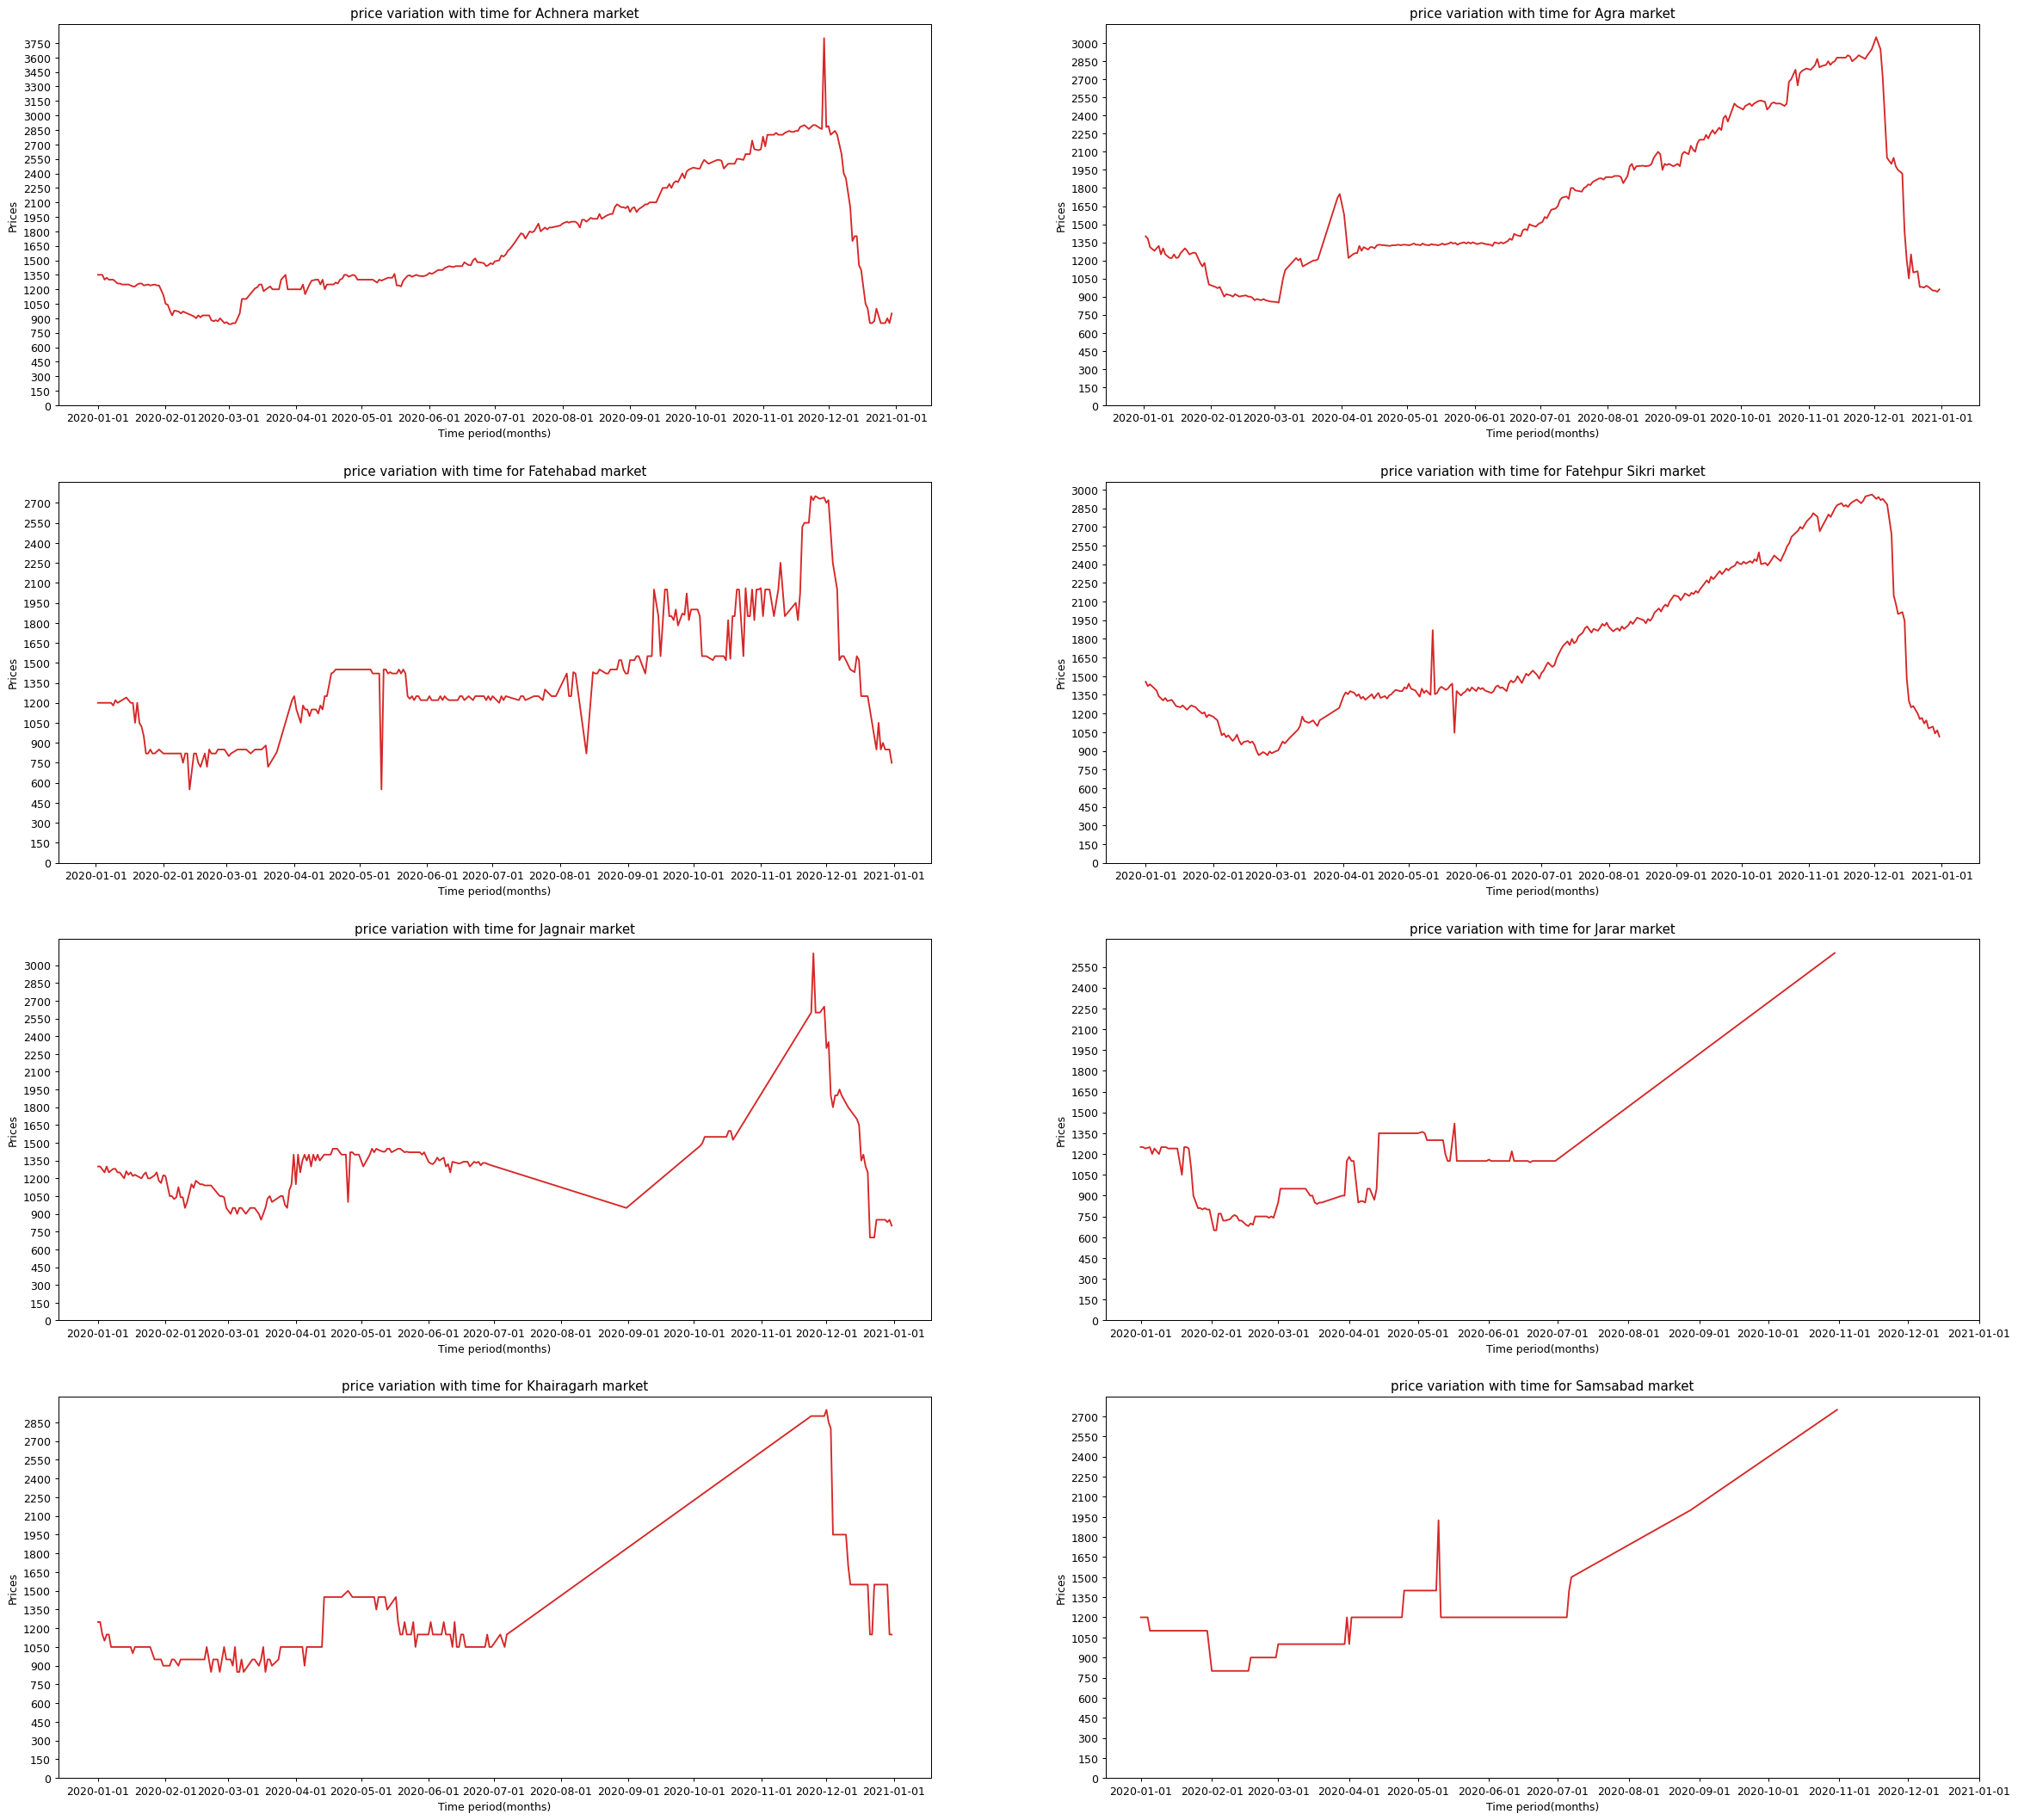

In [16]:
figure, ax = plt.subplots(4,2,figsize=(32,30), dpi= 90)
i=0
j=0
for place in market:
   ##ploting the avg prices for each market over the period of 12 months
    ax[i,j].plot(data[data['Market Name']==place]['Price Date'],data[data['Market Name']==place]['Modal Price(Rs./Quintal)'], color='tab:red')
    x_data = pd.date_range('2020-01-01', periods=13, freq='MS') 
    ax[i,j].set_xticks(x_data)
    ax[i,j].set_yticks(range(0,max(data[data['Market Name']==place]['Modal Price(Rs./Quintal)'])+50,150))
    ax[i,j].set_ylabel('Prices')
    ax[i,j].set_xlabel('Time period(months)')
    ax[i,j].set_title("price variation with time for "+place+" market")
    j+=1
    j=j%2
    if(j==0):
        i+=1

plt.show()

In all markets the prices starts raising during 4th quarter of the year and it was on peak for each market on Dec 2020. 
The graphs are mostly constant during raise in markets like : `Khairagarh`,`samsabad`,`jarar`. In these market it seems though the proper supply was not their or the data for the prices are missing for those months or people does not have much demand of potatoes in 4th quarter of the year.
We can also see that the prices falls drastically  in the Jan 2021. 

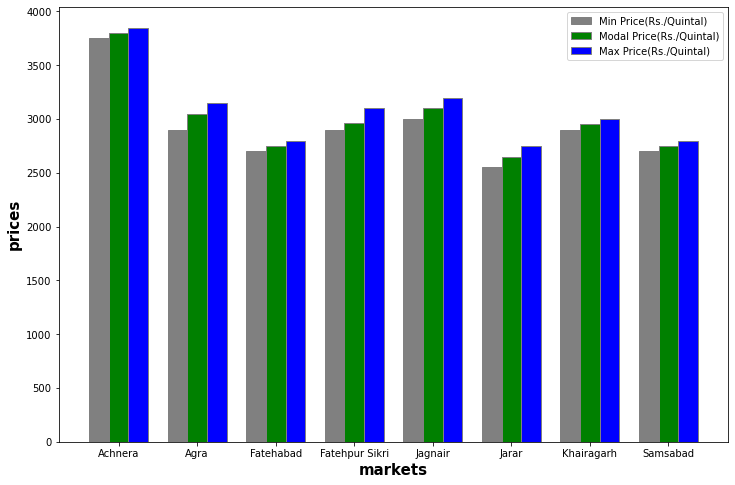

In [17]:
fig = plt.subplots(figsize =(12, 8))
width = 0.25
#creating bar for bar plot
# getting the max  of min,max and model price for each market
bar1=[max(data[data['Market Name']==place]['Min Price(Rs./Quintal)']) for place in market]
bar2=[max(data[data['Market Name']==place]['Modal Price(Rs./Quintal)']) for place in market]
bar3=[max(data[data['Market Name']==place]['Max Price(Rs./Quintal)']) for place in market]
br1 = np.arange(len(bar1))

br2 = [x + width for x in br1]
br3 = [x + width for x in br2]
#creating bar plot for the data
plt.bar(br1, bar1, color ='grey', width = width,
        edgecolor ='grey', label ='Min Price(Rs./Quintal)')
plt.bar(br2, bar2, color ='g', width = width,
        edgecolor ='grey', label ='Modal Price(Rs./Quintal)')
plt.bar(br3, bar3, color ='b', width = width,
        edgecolor ='grey', label ='Max Price(Rs./Quintal)')
 
# Adding Xticks
plt.xlabel('markets', fontweight ='bold', fontsize = 15)
plt.ylabel('prices', fontweight ='bold', fontsize = 15)
plt.xticks([r + width for r in range(len(bar1))],
        market)
 
plt.legend()

From above we can see that the most expensive market for potato is Achnera or one can say that its the most profitable market for the sellers.And Jarar is the least profitable market.